### Project Overview
This project is designed to help Butali Sugar mills Limited manage it`s fleet effectively. The project is developed with the transport department of the said comapny in mind. The comapny has several vehicles that are being managed by the transport department. For the smooth running of the company processes, every department needs to work optimally, transport department included. The project aims at making sure the fleets are utilised in a manner that serves their purpose effectively.

### Problem Statement 
The comapny having a huge fleet, makes it hard to handle and manage them cassually. There needs to be a system that helps to manage the same. The project at hand aims to adress some of the challenges that the department could otherwise face on fleet management. The project aims to do the following. 
1.  Monitor Fuel, maintainance and Insurance expenses for the fleets. This helps us to determine the units that are prooving expensive  to own
2.  Monitor fuel effieciency, Vehicle downtime and maintainace frequencies. This is critical for pinpointing units that are less efficient.
3.  Assess the quality of maintaince products from different suppliers. Spare parts of good quality are more durable and therefore we aim to identify which suppliers and parts are to be ordered.

### Data undesrstanding.
The data for this project has been obtained from the internet sources and is stores in a CSV format. Since this is a mock data obtained from chatGPT, it is not to be used to interpret the real situation on the ground. After loading and exploring the data in the notebook, we are able to know it`s peoperties. The data has 1791 rows and 8 columns . The datatypes present are *object* often used to represent categorical variables and a *float64* which shows numerical values.

In [19]:
#Import the necessary libraries
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [20]:

#Load data into the Notebook
df= pd.read_csv('fleet_operations_dataset_v2.csv')
df.head()

,Number_Plate,Vehicle_Type,Part_Name,Category,Supplier,Purchase_Cost,Service_Date,Issue_Reported
0,KCN 625C,Tractor,Battery,Electrical,Aeolus,4800.89,2024-08-12,Battery issue
1,KCN 625C,Tractor,Radiator,Cooling System,MechWorks,3507.80,2024-09-21,Oil leak
2,KCN 625C,Tractor,Radiator,Cooling System,PartsPlus,9258.37,2025-05-11,Electrical fault
3,KCN 625C,Tractor,Fuel Pump,Fuel System,PartsPlus,1842.43,2024-09-25,Hydraulic issue
4,KDA 106P,Tractor,Radiator,Cooling System,PowerAuto,10222.35,2025-03-27,Brake failure


In [21]:
#Check shape of the data
df.shape

(1791, 8)

In [22]:
# Check the data types present
df.dtypes

Number_Plate       object
Vehicle_Type       object
Part_Name          object
Category           object
Supplier           object
Purchase_Cost     float64
Service_Date       object
Issue_Reported     object
dtype: object

In [23]:
# Check the overall infomation of the dataest
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1791 entries, 0 to 1790
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Number_Plate    1791 non-null   object 
 1   Vehicle_Type    1791 non-null   object 
 2   Part_Name       1791 non-null   object 
 3   Category        1791 non-null   object 
 4   Supplier        1791 non-null   object 
 5   Purchase_Cost   1791 non-null   float64
 6   Service_Date    1791 non-null   object 
 7   Issue_Reported  1791 non-null   object 
dtypes: float64(1), object(7)
memory usage: 112.1+ KB


In [24]:
#Check for the statistical summary
df.describe()

,Purchase_Cost
count,1791.000000
mean,8382.347013
std,3915.487125
min,1505.450000
25%,5018.740000
50%,8471.840000
75%,11863.665000
max,14970.890000



### Data cleaning
Data often is not reday for analysis in it`s raw form and therefore we need to clean it first. In this section we check for null values and either drop them or fill in with appropriate values such as **mode , mean or median**. We also check for duplicates and drop them to be able to get accrate insights when we proceed with analysis. From our code below, we see that we do have any missing values and no duplicates. Our data therefore is ready for the next step.

In [25]:
# Check for missing values
df.isnull().sum()

Number_Plate      0
Vehicle_Type      0
Part_Name         0
Category          0
Supplier          0
Purchase_Cost     0
Service_Date      0
Issue_Reported    0
dtype: int64

In [26]:
# Check for duplicates
df.duplicated().sum()

0

### Exploratory Data analysis
In this section we want to go deeper and explore the realtionships between the different features in our dataset. This is important as it eventually guides us on the type of models that we will need to use for our project. At this point we also get to decide which feature is going to be our target variable. Various visualizations are going to be used here.

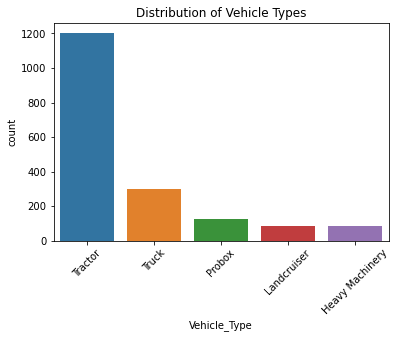

In [27]:
# Count the number of each unit
sns.countplot(x='Vehicle_Type', data=df)
plt.title('Distribution of Vehicle Types')
plt.xticks(rotation=45)
plt.show() 

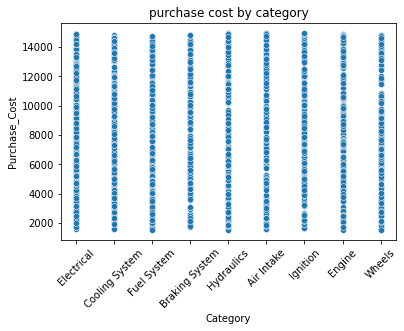

In [28]:
sns.scatterplot(x='Category', y='Purchase_Cost', data=df)
plt.title('purchase cost by category')
plt.xticks(rotation=45)
plt.show() 

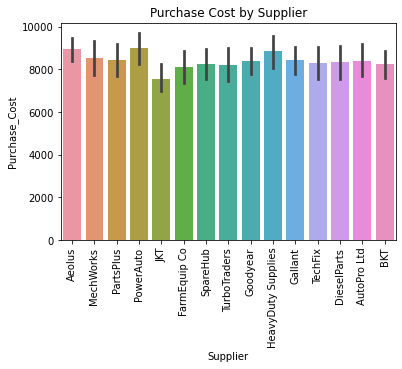

In [29]:
# The trend of money paid to suppliers
df_sorted = df.sort_values(by='Purchase_Cost', ascending=True)
sns.barplot(x= 'Supplier',y='Purchase_Cost', data=df)
plt.title('Purchase Cost by Supplier')
plt.xticks(rotation=90)
plt.show() 

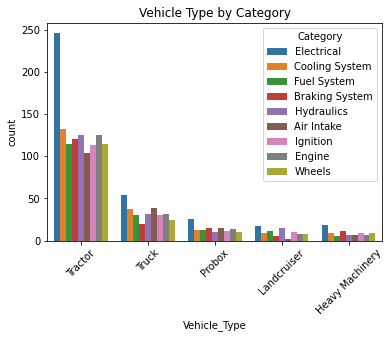

In [34]:
sns.countplot(x='Vehicle_Type', hue='Category', data=df)   
plt.title('Vehicle Type by Category')
plt.xticks(rotation=45);

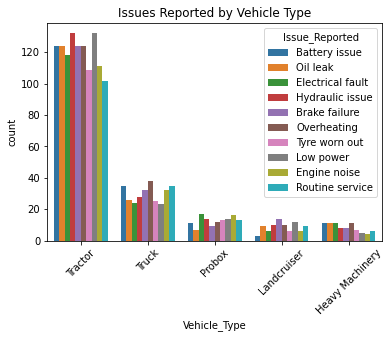

In [31]:
sns.countplot(x='Vehicle_Type', hue='Issue_Reported', data=df)  
plt.title('Issues Reported by Vehicle Type')    
plt.xticks(rotation=45);

In [32]:
suplier_cost= df.groupby('Supplier')["Purchase_Cost"].sum().sort_values(ascending=False).reset_index()

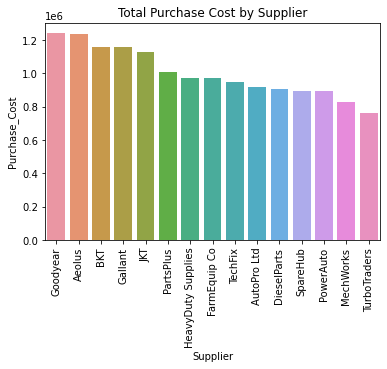

In [33]:
sns.barplot(x= 'Supplier', y="Purchase_Cost" , data= suplier_cost)
plt.xticks(rotation=90)
plt.title('Total Purchase Cost by Supplier');